## Recognizing Handwritten Digits on MNIST Dataset using KNN

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Data Preparation

In [26]:
df=pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [27]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data=df.values
print(data.shape)

(42000, 785)


In [29]:
X=data[:,1:]
Y=data[:,0]
print(X.shape,Y.shape)

(42000, 784) (42000,)


In [30]:
split=int(0.8*X.shape[0])
print(split)

33600


In [31]:
X_train=X[:split,:]
Y_train=Y[:split]

X_test=X[split: ,:]
Y_test=Y[split:]

In [33]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


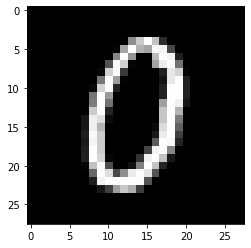

0


In [38]:
# Visualizing 
def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
drawImg(X_train[5])
print(Y_train[5])

## KNN

In [40]:
def euclidean(a1, a2):
    return np.sqrt(np.sum((a1 - a2) ** 2))


def knn(X_train, y_train, test_point, k=5):
    
    distances = []
    

    for data_point, label in zip(X_train, y_train):
        distance = euclidean(test_point, data_point)
        distances.append((distance, label))
        
    
    distances = sorted(distances, key=lambda x: x[0])
    
    
    k_nearest_neighbors = np.array(distances[:k])  
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    
    preds = labels[counts.argmax()]
    return preds

In [44]:
pred=knn(X_train,Y_train,X_test[1])
print(pred,Y_test[1])

7.0 7


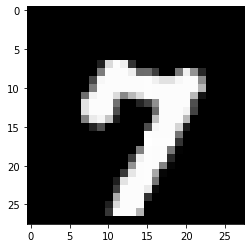

7


In [43]:
drawImg(X_test[1])
print(Y_test[1])

### Calculate accuracy

In [45]:
def calculate_accuracy(predictions, true_labels):
    return (predictions == true_labels).sum() / true_labels.shape[0]

In [ ]:
predictions=knn(X_train,Y_train,X_test)
print(calculate_accuracy(predictions,Y_test))

In [47]:
# Method-2
from sklearn.neighbors import KNeighborsClassifier
knn_sk = KNeighborsClassifier(n_neighbors=5)
knn_sk.fit(X_train, Y_train)

KNeighborsClassifier()

In [48]:
knn_sk.score(X_test, Y_test) # On MNIST

0.969047619047619